In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
df = pd.read_excel('Sales_Data.xlsx')

In [ ]:
sales_modified = df
sales_modified = sales_modified.copy()

In [ ]:
sales_modified.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
sales_modified.shape

(113036, 18)

In [ ]:
sales_modified.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [ ]:
sales_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

**Data Cleaning**

In [ ]:
sales_modified.duplicated().sum()

1000

In [ ]:
sales_modified.loc[sales_modified.duplicated()]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
1021,2013-12-19,19,December,2013,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159,714,531,1245
1091,2015-09-30,30,September,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10,20,20,40
1093,2013-10-24,24,October,2013,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,2,4,10,8,8,16
1095,2015-10-24,24,October,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,1,4,10,4,4,8
1193,2016-01-15,15,January,2016,42,Adults (35-64),M,France,Seine Saint Denis,Accessories,Bottles and Cages,Water Bottle - 30 oz.,14,2,5,29,28,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111029,2014-02-18,18,February,2014,49,Adults (35-64),F,United States,California,Bikes,Touring Bikes,"Touring-1000 Blue, 60",1,1482,2384,854,1482,2336
111031,2016-02-18,18,February,2016,49,Adults (35-64),F,United States,California,Bikes,Touring Bikes,"Touring-1000 Blue, 60",1,1482,2384,854,1482,2336
111265,2014-04-27,27,April,2014,31,Young Adults (25-34),M,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Blue, 50",1,1482,2384,378,1482,1860
111953,2013-09-20,20,September,2013,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735


In [ ]:
sales_modified.query('Product_Category == "Accessories"').head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
sales_modified.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [ ]:
sales_modified.duplicated(subset = ['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue']).sum()

1000

In [ ]:
sales_modified.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

**Exploratory Data Analysis**



1. Which year were the highest order made?

In [ ]:
ax1 = sales_modified.groupby('Year')['Order_Quantity'].sum()
ax1

Year
2011      5260
2012      5354
2013    294787
2014    379585
2015    289517
2016    370813
Name: Order_Quantity, dtype: int64

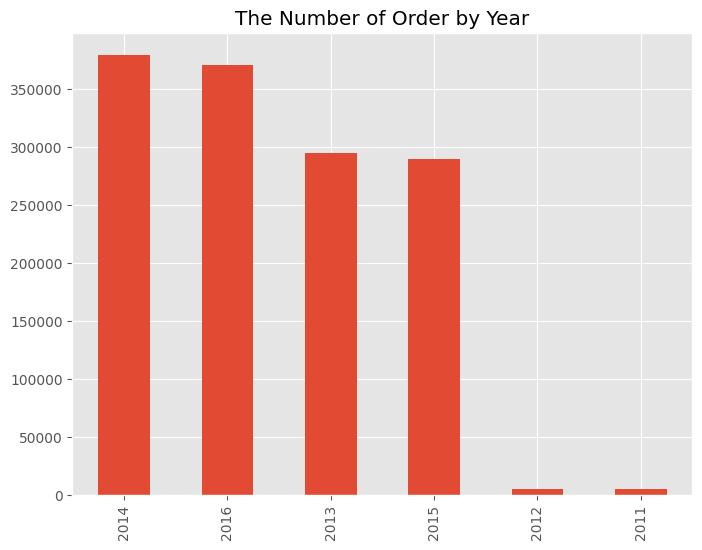

In [ ]:
ax2 = ax1.sort_values(ascending=False) \
      .plot(kind='bar', figsize=(8,6)) 
plt.title('The Number of Order by Year')
ax2.set_xlabel('')
plt.show()

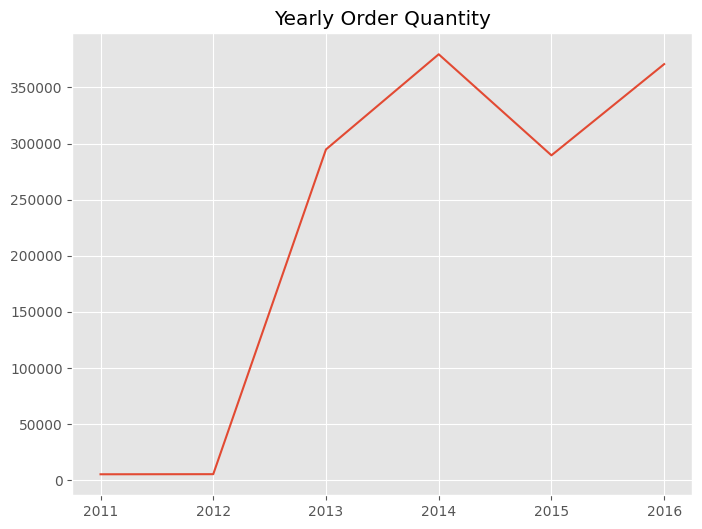

In [ ]:
ax2 = ax1.plot(kind='line', figsize=(8,6)) 
plt.title('Yearly Order Quantity')
ax2.set_xlabel('')
plt.show()


2. What is the Top 5 of the most purchased item (product) in the last 6 years?

In [ ]:
sales_modified.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
ax3 = sales_modified.groupby('Product')['Order_Quantity'].sum()[:5]

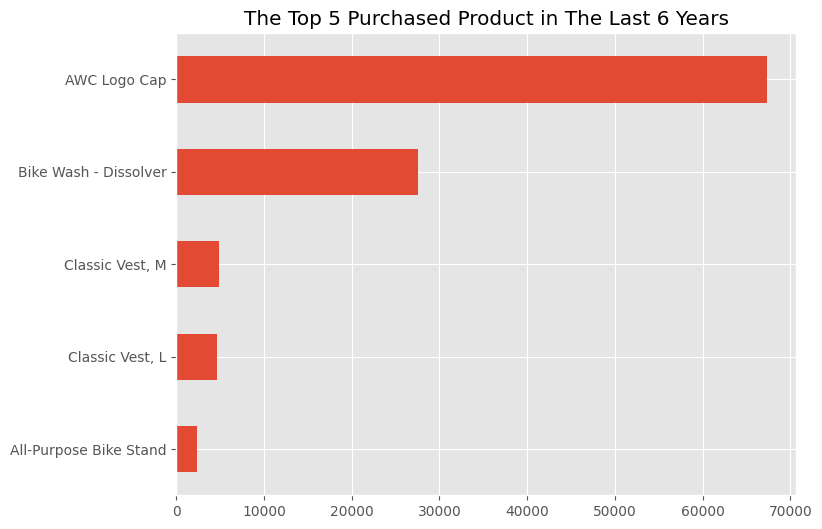

In [ ]:
ax4 = ax3.sort_values(ascending=True) \
     .plot(kind='barh', figsize=(8,6)) 
plt.title('The Top 5 Purchased Product in The Last 6 Years')
ax4.set_ylabel('')
plt.show()

3. In Which Year The Product Category Had The Highest Order?

In [ ]:
sales_modified.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
nmbr_order_product_Category = sales_modified.groupby(['Year', 'Product_Category'])['Order_Quantity'].sum()
avg_order_product_Category = nmbr_order_product_Category.mean()
print('The Average Number of Order is', avg_order_product_Category)

prodcategory_and_year = sales_modified.groupby(['Year', 'Product_Category'])['Order_Quantity'].sum().unstack()

def style_negative(v,props=''):
    return props if v > avg_order_product_Category else None
s2 = prodcategory_and_year.style.applymap(style_negative, props='color:blue;')\
.applymap (lambda v:'opacity = 20%;'if (v < 0.3) and (v > -0.3) else None)
s2         

The Average Number of Order is 96094.0


Product_Category,Accessories,Bikes,Clothing
Year,,,
2011,nan,5260.000000,nan
2012,nan,5354.000000,nan
2013,231142.000000,5710.000000,57935.000000
2014,303638.000000,4604.000000,71343.000000
2015,224840.000000,8556.000000,56121.000000
2016,294542.000000,6927.000000,69344.000000


In [ ]:
def highlight_max(s, props=''):
   return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;background-color:darkgreen', axis=0)

Product_Category,Accessories,Bikes,Clothing
Year,,,
2011,nan,5260.000000,nan
2012,nan,5354.000000,nan
2013,231142.000000,5710.000000,57935.000000
2014,303638.000000,4604.000000,71343.000000
2015,224840.000000,8556.000000,56121.000000
2016,294542.000000,6927.000000,69344.000000


3. In Which Year Every Each Sub Category Had The Highest Order?

In [ ]:
sales_modified.groupby(['Year', 'Sub_Category'])['Order_Quantity'].sum()

Year  Sub_Category   
2011  Mountain Bikes       1245
      Road Bikes           4015
2012  Mountain Bikes       1230
      Road Bikes           4124
2013  Bike Racks           1044
                          ...  
2016  Shorts               6598
      Socks                4971
      Tires and Tubes    143127
      Touring Bikes        1569
      Vests                3848
Name: Order_Quantity, Length: 72, dtype: int64

In [ ]:
nmbr_order_sub_category = sales_modified.groupby(['Year', 'Sub_Category'])['Order_Quantity'].sum()
avg_order_sub_category = nmbr_order_sub_category.mean()
print('The Average Number of Order is', avg_order_sub_category)

sub_category_and_year = sales_modified.groupby(['Year','Sub_Category'])['Order_Quantity'].sum().unstack()

def style_negative(v,props=''):
    return props if v > avg_order_sub_category else None
s3 = sub_category_and_year.style.applymap(style_negative, props='color:blue;')\
.applymap (lambda v:'opacity = 20%;'if (v < 0.2) and (v > -0.2) else None)
s3         

The Average Number of Order is 18684.944444444445


Sub_Category,Bike Racks,Bike Stands,Bottles and Cages,Caps,Cleaners,Fenders,Gloves,Helmets,Hydration Packs,Jerseys,Mountain Bikes,Road Bikes,Shorts,Socks,Tires and Tubes,Touring Bikes,Vests
Year,,,,,,,,,,,,,,,,,
2011,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1245.000000,4015.000000,nan,nan,nan,nan,nan
2012,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1230.000000,4124.000000,nan,nan,nan,nan,nan
2013,1044.000000,670.000000,50633.000000,14337.000000,5941.000000,14164.000000,8797.000000,40592.000000,4781.000000,20520.000000,2088.000000,2797.000000,7000.000000,3846.000000,113317.000000,825.000000,3435.000000
2014,1388.000000,582.000000,71916.000000,19800.000000,8041.000000,17348.000000,11499.000000,51597.000000,5314.000000,24167.000000,1724.000000,1856.000000,6784.000000,5132.000000,147452.000000,1024.000000,3961.000000
2015,1000.000000,622.000000,49350.000000,13916.000000,5766.000000,13802.000000,8499.000000,39498.000000,4647.000000,19909.000000,3124.000000,4202.000000,6786.000000,3729.000000,110155.000000,1230.000000,3282.000000
2016,1309.000000,538.000000,69827.000000,19215.000000,7826.000000,16824.000000,11183.000000,49919.000000,5172.000000,23529.000000,2581.000000,2777.000000,6598.000000,4971.000000,143127.000000,1569.000000,3848.000000


In [ ]:
def highlight_max(s, props=''):
   return np.where(s == np.nanmax(s.values), props, '')
s3.apply(highlight_max, props='color:white;background-color:darkgreen', axis=0)

Sub_Category,Bike Racks,Bike Stands,Bottles and Cages,Caps,Cleaners,Fenders,Gloves,Helmets,Hydration Packs,Jerseys,Mountain Bikes,Road Bikes,Shorts,Socks,Tires and Tubes,Touring Bikes,Vests
Year,,,,,,,,,,,,,,,,,
2011,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1245.000000,4015.000000,nan,nan,nan,nan,nan
2012,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1230.000000,4124.000000,nan,nan,nan,nan,nan
2013,1044.000000,670.000000,50633.000000,14337.000000,5941.000000,14164.000000,8797.000000,40592.000000,4781.000000,20520.000000,2088.000000,2797.000000,7000.000000,3846.000000,113317.000000,825.000000,3435.000000
2014,1388.000000,582.000000,71916.000000,19800.000000,8041.000000,17348.000000,11499.000000,51597.000000,5314.000000,24167.000000,1724.000000,1856.000000,6784.000000,5132.000000,147452.000000,1024.000000,3961.000000
2015,1000.000000,622.000000,49350.000000,13916.000000,5766.000000,13802.000000,8499.000000,39498.000000,4647.000000,19909.000000,3124.000000,4202.000000,6786.000000,3729.000000,110155.000000,1230.000000,3282.000000
2016,1309.000000,538.000000,69827.000000,19215.000000,7826.000000,16824.000000,11183.000000,49919.000000,5172.000000,23529.000000,2581.000000,2777.000000,6598.000000,4971.000000,143127.000000,1569.000000,3848.000000


<function matplotlib.pyplot.show(close=None, block=None)>

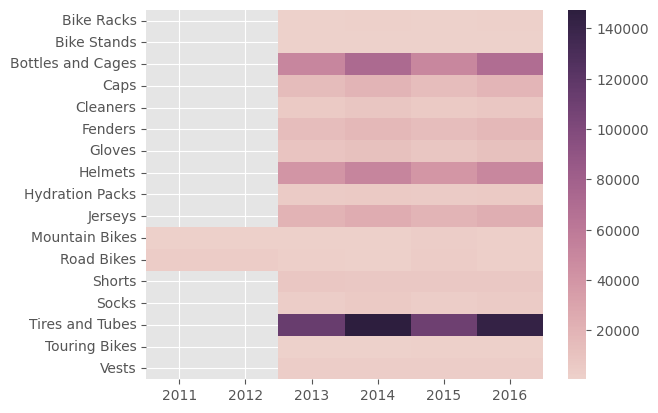

In [ ]:
ax1.sub_category_and_year = sales_modified.groupby(['Sub_Category', 'Year'])['Order_Quantity'].sum().unstack()
ax2.sub_category_and_year = sns.heatmap(ax1.sub_category_and_year, cmap=sns.cubehelix_palette (as_cmap=True))
ax2.sub_category_and_year.set_ylabel("")
ax2.sub_category_and_year.set_xlabel("")
plt.show

4. Which Countries had the highest revenue?

In [ ]:
sales_modified.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


<function matplotlib.pyplot.show(close=None, block=None)>

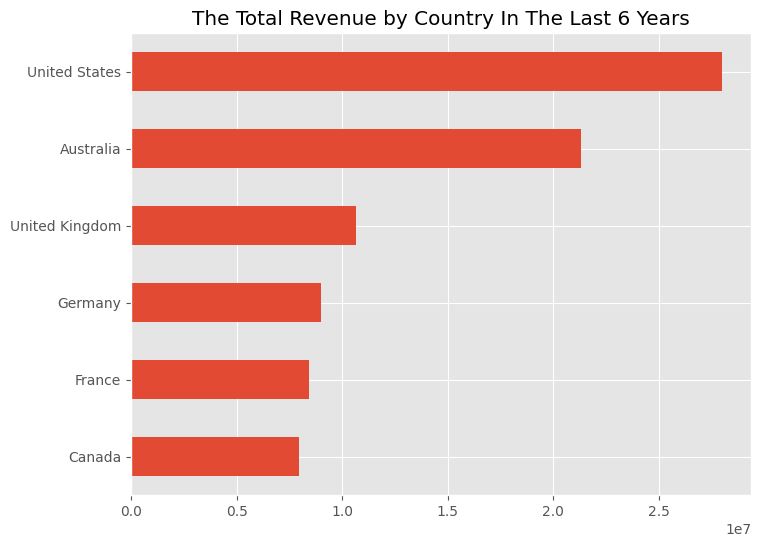

In [ ]:
Ax1_Country_And_Rev = sales_modified.groupby(['Country'])['Revenue'].sum()
Ax2_Country_And_Rev = Ax1_Country_And_Rev.sort_values(ascending=True).plot(kind='barh', figsize=(8,6), title = 'The Total Revenue by Country In The Last 6 Years')
Ax2_Country_And_Rev.set_ylabel("")
plt.show

5. Finding the revenue growth by country

In [ ]:
sales_modified.groupby(['Year','Country'])['Revenue'].sum() \
                      .unstack()

Country,Australia,Canada,France,Germany,United Kingdom,United States
Year,,,,,,
2011,2529914,789798,946624,833603,823481,3041468
2012,2557511,835527,962153,835188,834885,3150719
2013,4107470,1443537,1431870,1452704,1868796,4935660
2014,2802842,1471522,1411100,1702508,2014044,4750708
2015,5712339,1731954,1877928,1931091,2484181,6286498
2016,3591983,1663400,1803197,2223502,2620809,5810494


<function matplotlib.pyplot.show(close=None, block=None)>

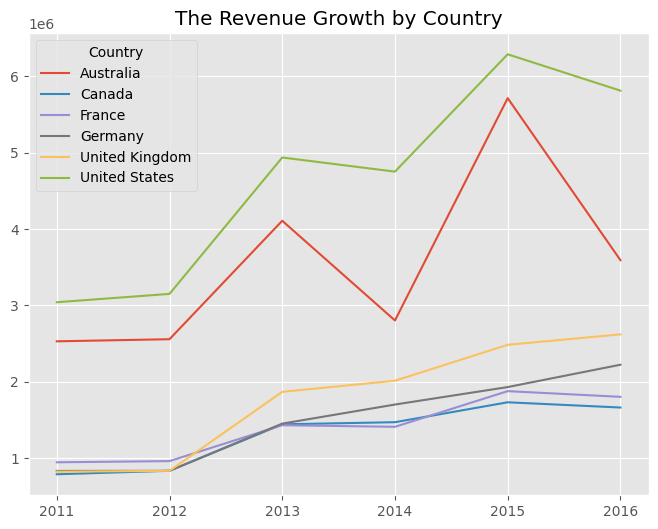

In [ ]:
Ax1_Country_And_Rev = sales_modified.groupby(['Year','Country'])['Revenue'].sum() \
                      .unstack()
Ax2_Country_And_Rev = Ax1_Country_And_Rev.plot(kind='line', figsize=(8,6), title = 'The Revenue Growth by Country')
Ax2_Country_And_Rev.set_ylabel("")
Ax2_Country_And_Rev.set_xlabel("")
plt.show

6. Which customer groups had the highest percentage of order in the last 6 years?

In [ ]:
sales_modified.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [ ]:
Total_Order_By_Age_All = sales_modified['Order_Quantity'].sum()

In [ ]:
Total_Order_By_Age_Group = sales_modified.groupby(['Age_Group'])['Order_Quantity'].sum() 
Percent_Order_By_Age_Group = (Total_Order_By_Age_Group / Total_Order_By_Age_All) * 100
Percent_Order_By_Age_Group

Age_Group
Adults (35-64)          49.982086
Seniors (64+)            0.734177
Young Adults (25-34)    33.217103
Youth (<25)             16.066634
Name: Order_Quantity, dtype: float64

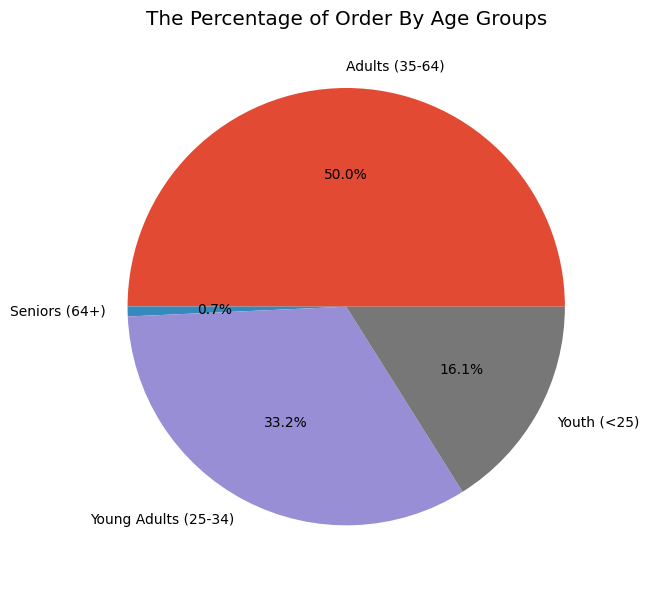

In [ ]:
ax1_Percent_Order_By_Age_Group = (Total_Order_By_Age_Group / Total_Order_By_Age_All) * 100
ax2 = (Total_Order_By_Age_Group / Total_Order_By_Age_All) * 100

x = [49.982086, 0.734177, 33.217103, 16.066634]
my_labels = ['Adults (35-64)', 'Seniors (64+)', 'Young Adults (25-34)', 'Youth (<25)']

fig, ax2 = plt.subplots(figsize=(8, 6))
ax2.pie(x, labels= my_labels, autopct='%.1f%%')
ax2.set_title('The Percentage of Order By Age Groups')
plt.tight_layout()

6. Find yearly profit, cost, and revenue

In [ ]:
ax1_Cost_Profit_Rev = sales_modified.groupby('Year')['Cost', 'Profit', 'Revenue'].sum()
ax1_Cost_Profit_Rev

<ipython-input-57-cbca5dd98619>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax1_Cost_Profit_Rev = sales_modified.groupby('Year')['Cost', 'Profit', 'Revenue'].sum()


,Cost,Profit,Revenue
Year,,,
2011,6083587,2881301,8964888
2012,6223990,2951993,9175983
2013,9280829,5959208,15240037
2014,8288637,5864087,14152724
2015,12495428,7528563,20023991
2016,10677437,7035948,17713385


<function matplotlib.pyplot.show(close=None, block=None)>

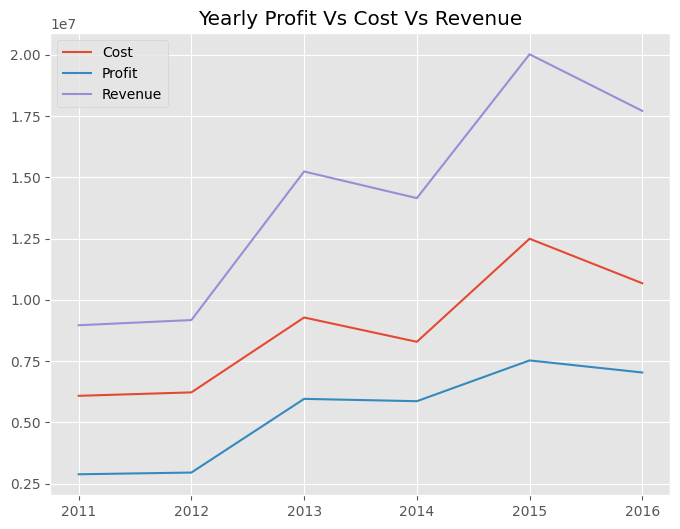

In [ ]:
ax2_Cost_Profit_Rev = ax1_Cost_Profit_Rev.plot(kind='line', 
                                                 figsize=(8,6), 
                                                 title = 'Yearly Profit Vs Cost Vs Revenue')
ax2_Cost_Profit_Rev.set_xlabel('')
plt.show

**Statistics**

In [ ]:
sales_modified.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
sales_modified.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


<Axes: >

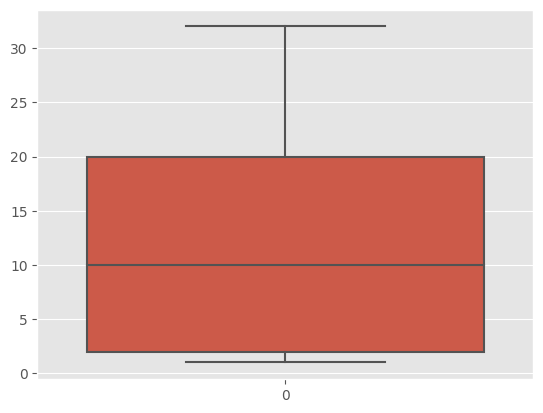

In [ ]:
sns.boxplot(sales_modified['Order_Quantity'])

<Axes: >

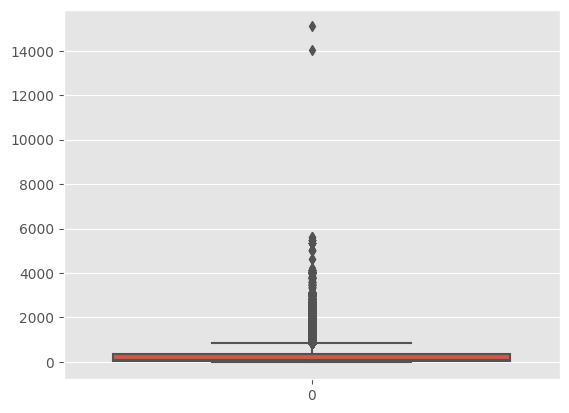

In [ ]:
sns.boxplot(sales_modified['Profit'])

<Axes: >

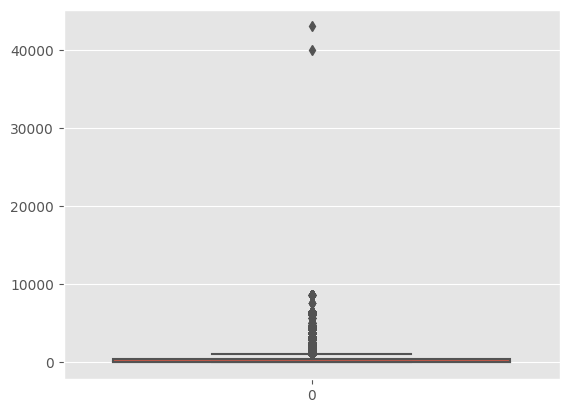

In [ ]:
sns.boxplot(sales_modified['Cost'])

<Axes: >

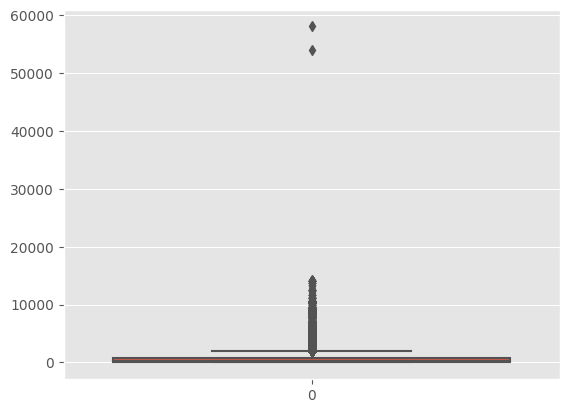

In [ ]:
sns.boxplot(sales_modified['Revenue'])

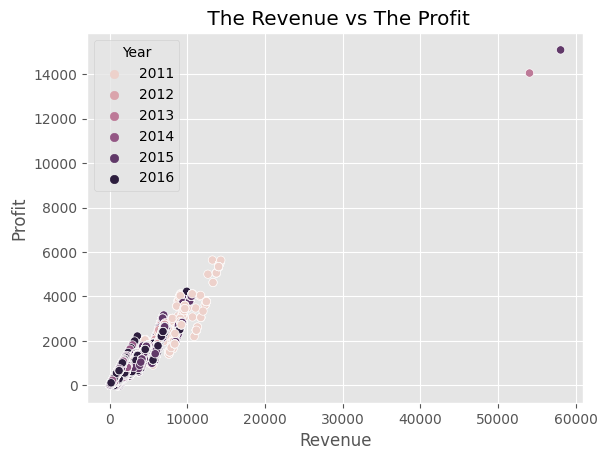

In [ ]:
ax_sctr_revenue_profit = sns.scatterplot(x="Revenue", 
          y = "Profit",
          hue ="Year",
          data = sales_modified)
ax_sctr_revenue_profit.set_title(" The Revenue vs The Profit")
plt.show()

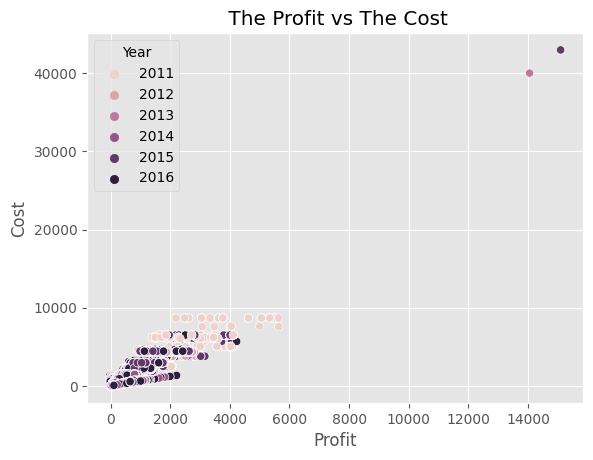

In [ ]:
ax_sctr_profit_cost = sns.scatterplot(x="Profit", 
          y = "Cost",
          hue ="Year",
          data = sales_modified)
ax_sctr_profit_cost.set_title(" The Profit vs The Cost")
plt.show()